<a href="https://colab.research.google.com/github/gustavoramos82/coda-amazonia-2024/blob/main/Coda_workshop_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install basedosdados

In [ ]:
import basedosdados as bd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
reservatorios = bd.read_table(dataset_id='br_ons_avaliacao_operacao',
table_id='reservatorio',
billing_project_id="558244945046")

reservatorios.head()

Downloading: 100%|██████████| 159/159 [00:00<00:00, 732.43rows/s]


,data,id_subsistema,subsistema,id_empreendimento_aneel,id_reservatorio_planejamento,id_posto_vazao,reservatorio_equivalente,reservatorio,tipo_reservatorio,usina,...,cota_minima,volume_maximo,volume_minimo,volume_util,produtividade_especifica,produtividade_65_volume_util,tipo_perda,perda_carga,latitude,longitude
0,1956-04-01,S,SUL,UHE.PH.RS.000635-1.01,,,SUL,CANASTRA,FIO DAGUA,CANASTRA,...,540.33,0.425,0.183,0.242,0.000000,0.0000,nan,NaN,NaN,NaN
1,2007-02-03,S,SUL,UHE.PH.SC.027401-1.01,9,216,SUL,CAMPOS NOVOS,RESERVATORIO COM USINA,CAMPOS NOVOS,...,655.00,1477.000,1320.000,129.620,0.009083,1.6063,m,2.48,-27.603056,-51.323611
2,2005-11-01,S,SUL,UHE.PH.RS.027556-5.01,86,215,SUL,BARRA GRANDE,RESERVATORIO COM USINA,BARRA GRANDE,...,617.00,4904.450,2711.790,2192.660,0.009218,1.4153,m,2.79,-27.777222,-51.188611
3,2022-07-21,S,SUL,UHE.PH.SC.030938-9.01,88,88,SUL,SAO ROQUE,RESERVATORIO COM USINA,SAO ROQUE,...,746.00,795.670,336.720,458.950,0.008878,0.4335,m,0.60,-27.497778,-50.804639
4,2013-09-24,S,SUL,UHE.PH.SC.030415-8.01,89,89,SUL,GARIBALDI,RESERVATORIO COM USINA,GARIBALDI,...,702.50,296.000,232.000,64.230,0.008626,0.3691,m,1.19,-27.624722,-50.983889


In [ ]:
reservatorios.columns

Index(['data', 'id_subsistema', 'subsistema', 'id_empreendimento_aneel',
       'id_reservatorio_planejamento', 'id_posto_vazao',
       'reservatorio_equivalente', 'reservatorio', 'tipo_reservatorio',
       'usina', 'bacia', 'rio', 'cota_maxima', 'cota_minima', 'volume_maximo',
       'volume_minimo', 'volume_util', 'produtividade_especifica',
       'produtividade_65_volume_util', 'tipo_perda', 'perda_carga', 'latitude',
       'longitude'],
      dtype='object')

In [ ]:
reservatorios = reservatorios[['data','reservatorio','tipo_reservatorio','bacia',
                               'rio','volume_util','latitude','longitude']]

In [ ]:
reservatorios.head()

,data,reservatorio,tipo_reservatorio,bacia,rio,volume_util,latitude,longitude
0,1956-04-01,CANASTRA,FIO DAGUA,JACUI,JACUI,0.242,NaN,NaN
1,2007-02-03,CAMPOS NOVOS,RESERVATORIO COM USINA,URUGUAI,CANOAS,129.620,-27.603056,-51.323611
2,2005-11-01,BARRA GRANDE,RESERVATORIO COM USINA,URUGUAI,PELOTAS,2192.660,-27.777222,-51.188611
3,2022-07-21,SAO ROQUE,RESERVATORIO COM USINA,URUGUAI,CANOAS,458.950,-27.497778,-50.804639
4,2013-09-24,GARIBALDI,RESERVATORIO COM USINA,URUGUAI,CANOAS,64.230,-27.624722,-50.983889


In [ ]:
lista_estado = pd.read_csv('https://raw.githubusercontent.com/acaicomdados/analise-reservatorios-federais/main/Datasets/lista_reservatorios.csv')
lista_estado.head()

,Unnamed: 0,sistema,codigo,reservatorio,res_latitude,res_longitude,municipio,codigo_municipio_ibge,estado_nome,estado_sigla,rio,sub_bacia,bacia
0,1,nordeste_semiarido,12001,25 DE MARÇO,-6.110896,-38.216597,PAU DOS FERROS,2409407.0,Rio Grande do Norte,RN,RIACHO CAJAZEIRAS,APODI/MOSSORÓ,APODI/MOSSORÓ
1,2,nordeste_semiarido,12002,ABÓBORAS,-8.087024,-39.429267,PARNAMIRIM,2610400.0,Pernambuco,PE,RIO SÃO DOMINGOS,TERRA NOVA,TERRA NOVA
2,3,nordeste_semiarido,12003,ACARAPE DO MEIO,-4.193478,-38.799304,REDENÇÃO,2311603.0,Ceará,CE,RIO PACOTI,METROPOLITANA,METROPOLITANA
3,4,nordeste_semiarido,12004,ACARAÚ MIRIM,-3.506032,-40.278611,MASSAPÊ,2308005.0,Ceará,CE,RIO ACARAÚ MIRIM,ACARAÚ,ACARAÚ
4,5,nordeste_semiarido,12005,ACAUÃ,-7.441694,-35.561031,ITATUBA,2507200.0,Paraíba,PB,RIO PARAÍBA,ALTO PARAÍBA,ALTO PARAÍBA


In [ ]:
lista_estado = lista_estado[['reservatorio','estado_sigla']]
lista_estado.head()

,reservatorio,estado_sigla
0,25 DE MARÇO,RN
1,ABÓBORAS,PE
2,ACARAPE DO MEIO,CE
3,ACARAÚ MIRIM,CE
4,ACAUÃ,PB


In [ ]:
reservatorios = reservatorios.merge(lista_estado, on='reservatorio')
reservatorios.head()

,data,reservatorio,tipo_reservatorio,bacia,rio,volume_util,latitude,longitude,estado_sigla
0,2007-02-03,CAMPOS NOVOS,RESERVATORIO COM USINA,URUGUAI,CANOAS,129.62,-27.603056,-51.323611,SC
1,2007-02-03,CAMPOS NOVOS,RESERVATORIO COM USINA,URUGUAI,CANOAS,129.62,-27.603056,-51.323611,SC
2,2005-11-01,BARRA GRANDE,RESERVATORIO COM USINA,URUGUAI,PELOTAS,2192.66,-27.777222,-51.188611,SC
3,2005-11-01,BARRA GRANDE,RESERVATORIO COM USINA,URUGUAI,PELOTAS,2192.66,-27.777222,-51.188611,RS
4,2013-09-24,GARIBALDI,RESERVATORIO COM USINA,URUGUAI,CANOAS,64.23,-27.624722,-50.983889,SC


In [ ]:

reservatorios['data'] = pd.to_datetime(reservatorios['data'],format='%Y-%m-%d')
reservatorios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 225
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   data               226 non-null    datetime64[ns]
 1   reservatorio       226 non-null    object        
 2   tipo_reservatorio  226 non-null    object        
 3   bacia              226 non-null    object        
 4   rio                226 non-null    object        
 5   volume_util        226 non-null    float64       
 6   latitude           226 non-null    float64       
 7   longitude          226 non-null    float64       
 8   estado_sigla       226 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 17.7+ KB


In [ ]:
reservatorios['ano'] = reservatorios['data'].dt.year

reservatorios.head()


,data,reservatorio,tipo_reservatorio,bacia,rio,volume_util,latitude,longitude,estado_sigla,ano
0,2007-02-03,CAMPOS NOVOS,RESERVATORIO COM USINA,URUGUAI,CANOAS,129.62,-27.603056,-51.323611,SC,2007
1,2007-02-03,CAMPOS NOVOS,RESERVATORIO COM USINA,URUGUAI,CANOAS,129.62,-27.603056,-51.323611,SC,2007
2,2005-11-01,BARRA GRANDE,RESERVATORIO COM USINA,URUGUAI,PELOTAS,2192.66,-27.777222,-51.188611,SC,2005
3,2005-11-01,BARRA GRANDE,RESERVATORIO COM USINA,URUGUAI,PELOTAS,2192.66,-27.777222,-51.188611,RS,2005
4,2013-09-24,GARIBALDI,RESERVATORIO COM USINA,URUGUAI,CANOAS,64.23,-27.624722,-50.983889,SC,2013


In [ ]:
reservatorios.drop_duplicates(inplace=True)
reservatorios.head()

,data,reservatorio,tipo_reservatorio,bacia,rio,volume_util,latitude,longitude,estado_sigla,ano
0,2007-02-03,CAMPOS NOVOS,RESERVATORIO COM USINA,URUGUAI,CANOAS,129.62,-27.603056,-51.323611,SC,2007
2,2005-11-01,BARRA GRANDE,RESERVATORIO COM USINA,URUGUAI,PELOTAS,2192.66,-27.777222,-51.188611,SC,2005
3,2005-11-01,BARRA GRANDE,RESERVATORIO COM USINA,URUGUAI,PELOTAS,2192.66,-27.777222,-51.188611,RS,2005
4,2013-09-24,GARIBALDI,RESERVATORIO COM USINA,URUGUAI,CANOAS,64.23,-27.624722,-50.983889,SC,2013
6,2002-02-16,MACHADINHO,RESERVATORIO COM USINA,URUGUAI,URUGUAI,1055.81,-27.524444,-51.788889,SC,2002


Text(0, 0.5, 'Quantidade')

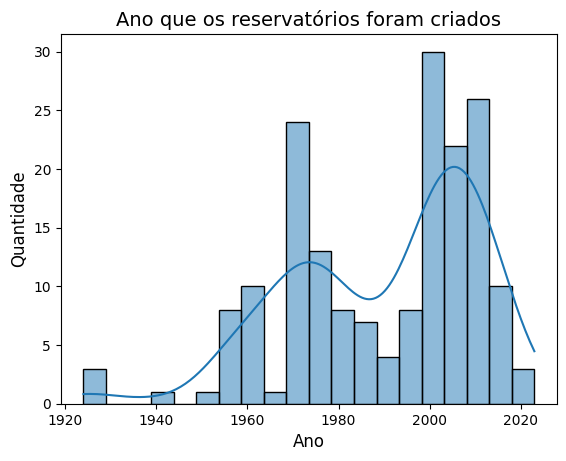

In [ ]:
plt.title('Ano que os reservatórios foram criados',
          fontsize=14)
sns.histplot(x='ano',data=reservatorios,kde=True,bins=20)
plt.xlabel('Ano',fontsize=12)
plt.ylabel('Quantidade',fontsize=12)

<Axes: xlabel='Count', ylabel='tipo_reservatorio'>

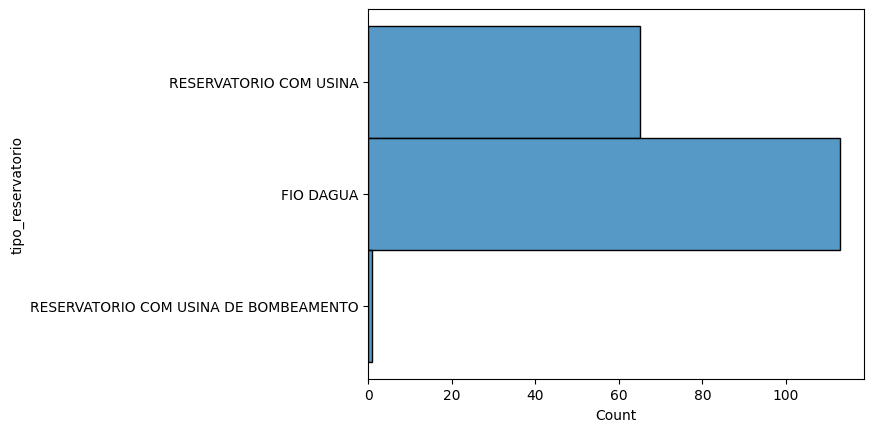

In [ ]:
sns.histplot(y='tipo_reservatorio',data=reservatorios,bins=20)

<Axes: xlabel='estado_sigla', ylabel='Count'>

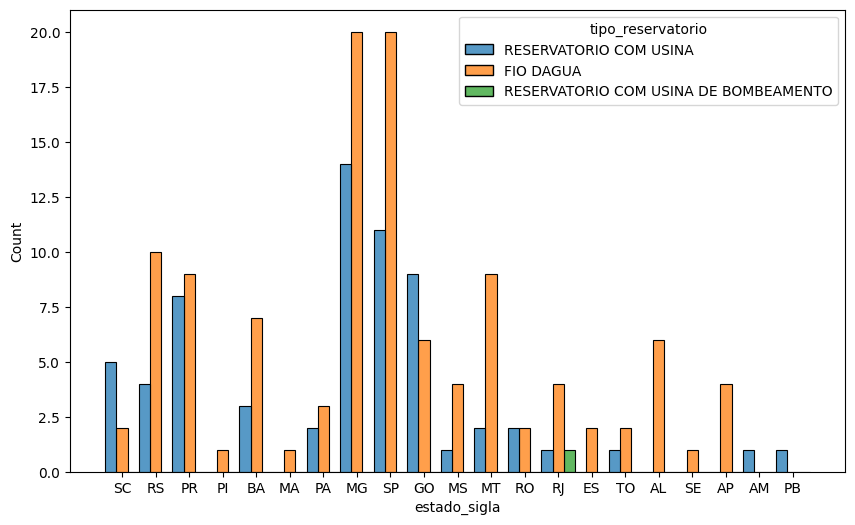

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x='estado_sigla',data=reservatorios,hue='tipo_reservatorio',multiple='dodge')

<Axes: xlabel='estado_sigla', ylabel='volume_util'>

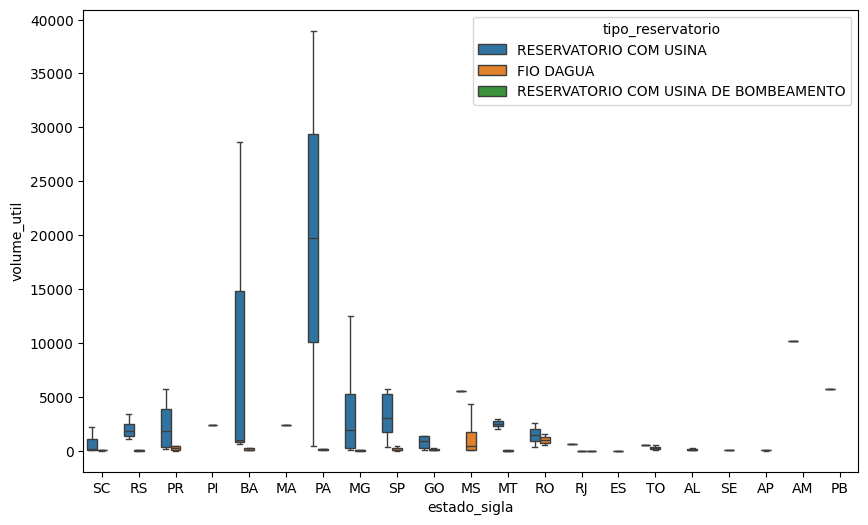

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='estado_sigla',y='volume_util',data=reservatorios,hue='tipo_reservatorio',
            showfliers=False)

<Axes: xlabel='Count', ylabel='bacia'>

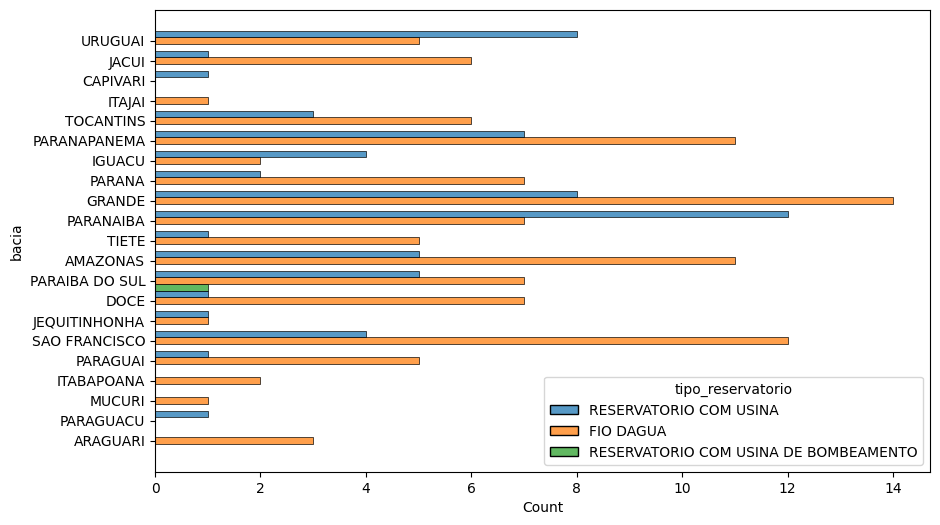

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(y='bacia',data=reservatorios,hue='tipo_reservatorio',multiple='dodge')

In [ ]:
mapa_reservatorio = px.scatter_mapbox(reservatorios,lat='latitude',lon='longitude',color='tipo_reservatorio',
                                      hover_name='reservatorio', hover_data=['bacia','rio','data'],
                                      title='Reservatorios do SIN')
mapa_reservatorio.update_layout(mapbox_style="open-street-map")
mapa_reservatorio.show()